In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
dfEnvi = pd.read_excel(open('dfEva.xlsx','rb'),sheet_name='Sheet1')
dfEnvi

,Unnamed: 0,dSoilMoisture,SoilMoisture,Humidity,SoilTemperature,AirTemperature,Light,TimeStamp
0,0,-1.1210,47.6698,26.8,25.5,19.26,740,1575534818
1,1,-0.1969,46.5488,27.6,25.5,19.28,608,1575536038
2,2,-2.6629,46.5373,30.6,24.5,19.46,344,1575538498
3,3,-3.4028,43.8744,33.8,23.8,19.42,194,1575539698
4,4,-2.9186,40.4716,34.7,23.5,19.37,26,1575540899
...,...,...,...,...,...,...,...,...
734,734,-1.0427,35.5950,71.7,27.7,24.82,825,1578039173
735,735,-0.6299,34.5523,71.1,25.2,24.77,562,1578040393
736,736,-1.3692,33.9224,69.6,27.4,24.75,623,1578041613
737,737,-1.8395,32.5532,72.9,27.1,24.68,416,1578042833


In [3]:
x_data = [[dfEnvi.SoilMoisture[i],dfEnvi.Humidity[i],dfEnvi.AirTemperature[i],dfEnvi.Light[i]] for i in range(len(dfEnvi))]
x_data
y_data = [dfEnvi.dSoilMoisture[i]*-1 for i in range(len(dfEnvi))]
y_data


[1.121000000000002,
 0.1968999999999994,
 2.6629,
 3.402799999999999,
 2.918599999999998,
 2.719100000000005,
 2.066000000000003,
 1.874899999999997,
 1.504200000000001,
 1.097799999999999,
 1.780899999999999,
 1.9694,
 1.403300000000002,
 1.235199999999999,
 1.316600000000001,
 1.4331,
 1.406500000000001,
 1.224799999999998,
 1.045500000000001,
 0.6759000000000004,
 0.5278999999999989,
 0.565900000000001,
 0.4169,
 0.4547999999999988,
 0.3809000000000005,
 0.3816000000000006,
 0.3056000000000001,
 0.3795999999999999,
 0.2301000000000002,
 0.1540999999999997,
 0.07760000000000034,
 0.003299999999999415,
 0.002499999999999503,
 0.001300000000000523,
 0.0007999999999999119,
 0.07709999999999972,
 0.07629999999999981,
 0.1521999999999988,
 1.851700000000008,
 5.899099999999997,
 7.801299999999998,
 5.279399999999995,
 7.000700000000002,
 4.170200000000001,
 2.462200000000003,
 0.8042999999999978,
 0.491100000000003,
 4.489100000000001,
 3.627600000000001,
 2.9162,
 2.8857,
 2.566200000000

In [5]:
indexX = ['SoilMoisture', 'Humidity', 'AirTemperature', 'Light']
# scale_x_data = MinMaxScaler.fit_transform(x_data[index])
df_x_data = dfEnvi[indexX]
scale_x_data = MinMaxScaler().fit_transform(df_x_data[indexX])
scale_x_data = scale_x_data.tolist()

In [7]:
indexY = ['dSoilMoisture']
df_y_data = -dfEnvi[indexY]
# max_y_data = max(df_y_data[indexY[0]])
# max_y_data
# scale_y_data = df_y_data[indexY[0]]/max_y_data
# scale_y_data = scale_y_data.tolist()
# plt.hist(scale_y_data)
scale_y_data = df_y_data[indexY[0]]
scale_y_data = scale_y_data.tolist()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scale_x_data,scale_y_data, test_size =  0.2, random_state = 42)

(array([106.,  28.,   9.,   0.,   1.,   2.,   0.,   1.,   0.,   1.]),
 array([3.200000e-04, 1.103878e+00, 2.207436e+00, 3.310994e+00,
        4.414552e+00, 5.518110e+00, 6.621668e+00, 7.725226e+00,
        8.828784e+00, 9.932342e+00, 1.103590e+01]),
 <a list of 10 Patch objects>)

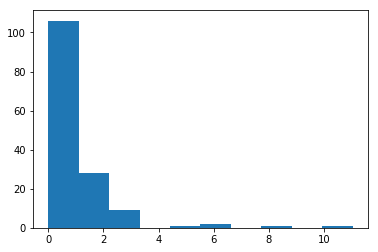

In [9]:
plt.hist(y_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


Using TensorFlow backend.


In [1]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
def create_mlp(dim, regress=False):
    # define our MLP network
    model = Sequential()
    model.add(Dense(50, input_dim=dim, activation="tanh"))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation="tanh"))
    model.add(Dropout(0.2))
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"))
    # return our model
    return model

Using TensorFlow backend.


In [49]:
model = create_mlp(4,True)
model.compile(loss="mse", optimizer='adam')
model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=1000, batch_size=len(x_train))

Train on 591 samples, validate on 148 samples
Epoch 1/1000
591/591 [==============================] - 1s 1ms/step - loss: 5.0014 - val_loss: 3.1865
Epoch 2/1000
591/591 [==============================] - 0s 7us/step - loss: 4.9554 - val_loss: 3.1504
Epoch 3/1000
591/591 [==============================] - 0s 10us/step - loss: 4.9100 - val_loss: 3.1182
Epoch 4/1000
591/591 [==============================] - 0s 9us/step - loss: 4.8694 - val_loss: 3.0855
Epoch 5/1000
591/591 [==============================] - 0s 11us/step - loss: 4.8281 - val_loss: 3.0528
Epoch 6/1000
591/591 [==============================] - 0s 8us/step - loss: 4.7868 - val_loss: 3.0193
Epoch 7/1000
591/591 [==============================] - 0s 12us/step - loss: 4.7443 - val_loss: 2.9865
Epoch 8/1000
591/591 [==============================] - 0s 9us/step - loss: 4.7026 - val_loss: 2.9544
Epoch 9/1000
591/591 [==============================] - 0s 8us/step - loss: 4.6617 - val_loss: 2.9230
Epoch 10/1000
591/591 [==========

Epoch 80/1000
591/591 [==============================] - 0s 13us/step - loss: 3.3771 - val_loss: 2.0623
Epoch 81/1000
591/591 [==============================] - 0s 13us/step - loss: 3.3717 - val_loss: 2.0599
Epoch 82/1000
591/591 [==============================] - 0s 6us/step - loss: 3.3663 - val_loss: 2.0575
Epoch 83/1000
591/591 [==============================] - 0s 15us/step - loss: 3.3611 - val_loss: 2.0551
Epoch 84/1000
591/591 [==============================] - 0s 13us/step - loss: 3.3560 - val_loss: 2.0528
Epoch 85/1000
591/591 [==============================] - 0s 14us/step - loss: 3.3509 - val_loss: 2.0506
Epoch 86/1000
591/591 [==============================] - 0s 10us/step - loss: 3.3460 - val_loss: 2.0484
Epoch 87/1000
591/591 [==============================] - 0s 9us/step - loss: 3.3411 - val_loss: 2.0462
Epoch 88/1000
591/591 [==============================] - 0s 12us/step - loss: 3.3364 - val_loss: 2.0440
Epoch 89/1000
591/591 [==============================] - 0s 6us/st

Epoch 159/1000
591/591 [==============================] - 0s 12us/step - loss: 3.0637 - val_loss: 1.8763
Epoch 160/1000
591/591 [==============================] - 0s 10us/step - loss: 3.0597 - val_loss: 1.8733
Epoch 161/1000
591/591 [==============================] - 0s 8us/step - loss: 3.0557 - val_loss: 1.8702
Epoch 162/1000
591/591 [==============================] - 0s 7us/step - loss: 3.0517 - val_loss: 1.8671
Epoch 163/1000
591/591 [==============================] - 0s 7us/step - loss: 3.0477 - val_loss: 1.8640
Epoch 164/1000
591/591 [==============================] - 0s 9us/step - loss: 3.0437 - val_loss: 1.8609
Epoch 165/1000
591/591 [==============================] - 0s 12us/step - loss: 3.0397 - val_loss: 1.8578
Epoch 166/1000
591/591 [==============================] - 0s 10us/step - loss: 3.0356 - val_loss: 1.8546
Epoch 167/1000
591/591 [==============================] - 0s 8us/step - loss: 3.0315 - val_loss: 1.8514
Epoch 168/1000
591/591 [==============================] - 0s

Epoch 238/1000
591/591 [==============================] - 0s 7us/step - loss: 2.7210 - val_loss: 1.6151
Epoch 239/1000
591/591 [==============================] - 0s 9us/step - loss: 2.7165 - val_loss: 1.6119
Epoch 240/1000
591/591 [==============================] - 0s 5us/step - loss: 2.7121 - val_loss: 1.6087
Epoch 241/1000
591/591 [==============================] - 0s 20us/step - loss: 2.7077 - val_loss: 1.6054
Epoch 242/1000
591/591 [==============================] - 0s 5us/step - loss: 2.7034 - val_loss: 1.6022
Epoch 243/1000
591/591 [==============================] - 0s 5us/step - loss: 2.6990 - val_loss: 1.5990
Epoch 244/1000
591/591 [==============================] - 0s 11us/step - loss: 2.6946 - val_loss: 1.5958
Epoch 245/1000
591/591 [==============================] - 0s 6us/step - loss: 2.6902 - val_loss: 1.5926
Epoch 246/1000
591/591 [==============================] - 0s 5us/step - loss: 2.6859 - val_loss: 1.5894
Epoch 247/1000
591/591 [==============================] - 0s 6

Epoch 317/1000
591/591 [==============================] - 0s 6us/step - loss: 2.4109 - val_loss: 1.3898
Epoch 318/1000
591/591 [==============================] - 0s 7us/step - loss: 2.4076 - val_loss: 1.3874
Epoch 319/1000
591/591 [==============================] - 0s 11us/step - loss: 2.4044 - val_loss: 1.3851
Epoch 320/1000
591/591 [==============================] - 0s 8us/step - loss: 2.4011 - val_loss: 1.3827
Epoch 321/1000
591/591 [==============================] - 0s 14us/step - loss: 2.3979 - val_loss: 1.3804
Epoch 322/1000
591/591 [==============================] - 0s 12us/step - loss: 2.3947 - val_loss: 1.3781
Epoch 323/1000
591/591 [==============================] - 0s 8us/step - loss: 2.3916 - val_loss: 1.3759
Epoch 324/1000
591/591 [==============================] - 0s 7us/step - loss: 2.3884 - val_loss: 1.3736
Epoch 325/1000
591/591 [==============================] - 0s 9us/step - loss: 2.3853 - val_loss: 1.3714
Epoch 326/1000
591/591 [==============================] - 0s 

Epoch 396/1000
591/591 [==============================] - 0s 6us/step - loss: 2.2108 - val_loss: 1.2463
Epoch 397/1000
591/591 [==============================] - 0s 5us/step - loss: 2.2089 - val_loss: 1.2449
Epoch 398/1000
591/591 [==============================] - 0s 5us/step - loss: 2.2071 - val_loss: 1.2436
Epoch 399/1000
591/591 [==============================] - 0s 8us/step - loss: 2.2053 - val_loss: 1.2423
Epoch 400/1000
591/591 [==============================] - 0s 11us/step - loss: 2.2035 - val_loss: 1.2410
Epoch 401/1000
591/591 [==============================] - 0s 6us/step - loss: 2.2017 - val_loss: 1.2397
Epoch 402/1000
591/591 [==============================] - 0s 9us/step - loss: 2.1999 - val_loss: 1.2384
Epoch 403/1000
591/591 [==============================] - 0s 8us/step - loss: 2.1981 - val_loss: 1.2371
Epoch 404/1000
591/591 [==============================] - 0s 7us/step - loss: 2.1963 - val_loss: 1.2359
Epoch 405/1000
591/591 [==============================] - 0s 6u

Epoch 475/1000
591/591 [==============================] - 0s 8us/step - loss: 2.0979 - val_loss: 1.1632
Epoch 476/1000
591/591 [==============================] - 0s 13us/step - loss: 2.0968 - val_loss: 1.1623
Epoch 477/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0957 - val_loss: 1.1615
Epoch 478/1000
591/591 [==============================] - 0s 9us/step - loss: 2.0946 - val_loss: 1.1607
Epoch 479/1000
591/591 [==============================] - 0s 8us/step - loss: 2.0936 - val_loss: 1.1599
Epoch 480/1000
591/591 [==============================] - 0s 7us/step - loss: 2.0925 - val_loss: 1.1590
Epoch 481/1000
591/591 [==============================] - 0s 10us/step - loss: 2.0914 - val_loss: 1.1582
Epoch 482/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0904 - val_loss: 1.1574
Epoch 483/1000
591/591 [==============================] - 0s 7us/step - loss: 2.0893 - val_loss: 1.1566
Epoch 484/1000
591/591 [==============================] - 0s 9

Epoch 554/1000
591/591 [==============================] - 0s 6us/step - loss: 2.0263 - val_loss: 1.1069
Epoch 555/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0255 - val_loss: 1.1062
Epoch 556/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0248 - val_loss: 1.1056
Epoch 557/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0240 - val_loss: 1.1050
Epoch 558/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0233 - val_loss: 1.1044
Epoch 559/1000
591/591 [==============================] - 0s 9us/step - loss: 2.0225 - val_loss: 1.1038
Epoch 560/1000
591/591 [==============================] - 0s 7us/step - loss: 2.0218 - val_loss: 1.1032
Epoch 561/1000
591/591 [==============================] - 0s 5us/step - loss: 2.0210 - val_loss: 1.1026
Epoch 562/1000
591/591 [==============================] - 0s 6us/step - loss: 2.0203 - val_loss: 1.1020
Epoch 563/1000
591/591 [==============================] - 0s 7us

Epoch 633/1000
591/591 [==============================] - 0s 9us/step - loss: 1.9728 - val_loss: 1.0638
Epoch 634/1000
591/591 [==============================] - 0s 5us/step - loss: 1.9722 - val_loss: 1.0633
Epoch 635/1000
591/591 [==============================] - 0s 5us/step - loss: 1.9716 - val_loss: 1.0628
Epoch 636/1000
591/591 [==============================] - 0s 6us/step - loss: 1.9710 - val_loss: 1.0623
Epoch 637/1000
591/591 [==============================] - 0s 5us/step - loss: 1.9704 - val_loss: 1.0618
Epoch 638/1000
591/591 [==============================] - 0s 5us/step - loss: 1.9698 - val_loss: 1.0614
Epoch 639/1000
591/591 [==============================] - 0s 5us/step - loss: 1.9692 - val_loss: 1.0609
Epoch 640/1000
591/591 [==============================] - 0s 8us/step - loss: 1.9686 - val_loss: 1.0604
Epoch 641/1000
591/591 [==============================] - 0s 5us/step - loss: 1.9679 - val_loss: 1.0599
Epoch 642/1000
591/591 [==============================] - 0s 8us

Epoch 712/1000
591/591 [==============================] - 0s 8us/step - loss: 1.9274 - val_loss: 1.0282
Epoch 713/1000
591/591 [==============================] - 0s 7us/step - loss: 1.9269 - val_loss: 1.0278
Epoch 714/1000
591/591 [==============================] - 0s 10us/step - loss: 1.9263 - val_loss: 1.0274
Epoch 715/1000
591/591 [==============================] - 0s 8us/step - loss: 1.9258 - val_loss: 1.0270
Epoch 716/1000
591/591 [==============================] - 0s 9us/step - loss: 1.9253 - val_loss: 1.0266
Epoch 717/1000
591/591 [==============================] - 0s 6us/step - loss: 1.9247 - val_loss: 1.0262
Epoch 718/1000
591/591 [==============================] - 0s 12us/step - loss: 1.9242 - val_loss: 1.0258
Epoch 719/1000
591/591 [==============================] - 0s 7us/step - loss: 1.9236 - val_loss: 1.0253
Epoch 720/1000
591/591 [==============================] - 0s 10us/step - loss: 1.9231 - val_loss: 1.0249
Epoch 721/1000
591/591 [==============================] - 0s 

Epoch 791/1000
591/591 [==============================] - 0s 11us/step - loss: 1.8860 - val_loss: 0.9972
Epoch 792/1000
591/591 [==============================] - 0s 6us/step - loss: 1.8855 - val_loss: 0.9968
Epoch 793/1000
591/591 [==============================] - 0s 10us/step - loss: 1.8850 - val_loss: 0.9964
Epoch 794/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8845 - val_loss: 0.9960
Epoch 795/1000
591/591 [==============================] - 0s 6us/step - loss: 1.8840 - val_loss: 0.9957
Epoch 796/1000
591/591 [==============================] - 0s 8us/step - loss: 1.8835 - val_loss: 0.9953
Epoch 797/1000
591/591 [==============================] - 0s 12us/step - loss: 1.8830 - val_loss: 0.9949
Epoch 798/1000
591/591 [==============================] - 0s 19us/step - loss: 1.8825 - val_loss: 0.9946
Epoch 799/1000
591/591 [==============================] - 0s 7us/step - loss: 1.8820 - val_loss: 0.9942
Epoch 800/1000
591/591 [==============================] - 0s

Epoch 870/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8466 - val_loss: 0.9684
Epoch 871/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8461 - val_loss: 0.9680
Epoch 872/1000
591/591 [==============================] - 0s 7us/step - loss: 1.8456 - val_loss: 0.9677
Epoch 873/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8451 - val_loss: 0.9673
Epoch 874/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8446 - val_loss: 0.9670
Epoch 875/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8441 - val_loss: 0.9666
Epoch 876/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8436 - val_loss: 0.9662
Epoch 877/1000
591/591 [==============================] - 0s 4us/step - loss: 1.8431 - val_loss: 0.9659
Epoch 878/1000
591/591 [==============================] - 0s 8us/step - loss: 1.8426 - val_loss: 0.9655
Epoch 879/1000
591/591 [==============================] - 0s 9us

Epoch 949/1000
591/591 [==============================] - 0s 7us/step - loss: 1.8078 - val_loss: 0.9401
Epoch 950/1000
591/591 [==============================] - 0s 6us/step - loss: 1.8073 - val_loss: 0.9398
Epoch 951/1000
591/591 [==============================] - 0s 11us/step - loss: 1.8069 - val_loss: 0.9394
Epoch 952/1000
591/591 [==============================] - 0s 6us/step - loss: 1.8064 - val_loss: 0.9391
Epoch 953/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8059 - val_loss: 0.9387
Epoch 954/1000
591/591 [==============================] - 0s 7us/step - loss: 1.8054 - val_loss: 0.9384
Epoch 955/1000
591/591 [==============================] - 0s 5us/step - loss: 1.8049 - val_loss: 0.9380
Epoch 956/1000
591/591 [==============================] - 0s 8us/step - loss: 1.8044 - val_loss: 0.9376
Epoch 957/1000
591/591 [==============================] - 0s 7us/step - loss: 1.8039 - val_loss: 0.9373
Epoch 958/1000
591/591 [==============================] - 0s 7u

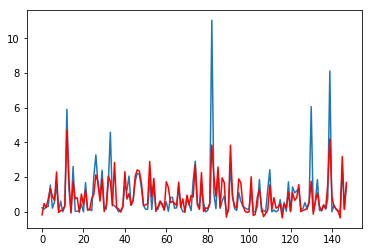

In [50]:
result=(model.predict(np.array(x_test)))
plt.plot(y_test,'-',)
plt.plot(result,'r-')
plt.show()
# result

In [51]:
model.save('eva1000.h5')

In [38]:
model1 =  keras.models.load_model('eva.h5')
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


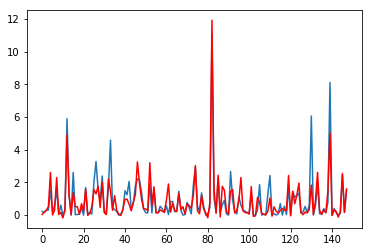

In [39]:
result=(model1.predict(np.array(x_test)))
plt.plot(y_test,'-',)
plt.plot(result,'r-')
plt.show()

In [52]:
tf.Session

NameError: name 'tf' is not defined